<a href="https://colab.research.google.com/github/ArslanAmanov/AI-ML-DL/blob/default-branch/Kaggle%20Projects%20/UCI%20ML%20drug%20dataset/uci_ml%20drug%20test%20ML_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Drug Ratings Dataset: Preliminary Data Exploration  **
Preliminary Exploration:


*   Most common conditions
*   Overall best and worst reviewed drugs


*   The curability of each disease
*   Best drugs for each condition

*   Most useful reviews
*   Usefulness vs review score

*   Bias in reviews
*   Users tend to review things they really like or really disliked,fewer reviews in the middle.









In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import style; style.use('ggplot')
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [2]:
# import dataframes

#Importing the datasets and libraries
url_1_test='https://raw.githubusercontent.com/ArslanAmanov/AI-ML-DL/default-branch/Kaggle%20Projects%20/UCI%20ML%20drug%20dataset/drugsComTest_raw.csv'
url_2_train='https://raw.githubusercontent.com/ArslanAmanov/AI-ML-DL/default-branch/Kaggle%20Projects%20/UCI%20ML%20drug%20dataset/drugsComTrain_raw.csv'
test = pd.read_csv(url_1_test)
train = pd.read_csv(url_2_train)

In [3]:
train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [4]:
test.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [5]:
list(train)==list(test)

True

Both train and test have the same features.Maybe they are split up to allow us to train/test our models easily.

In [6]:
list(train)

['uniqueID',
 'drugName',
 'condition',
 'review',
 'rating',
 'date',
 'usefulCount']

In [7]:
train.values.shape[0], test.values.shape[0], train.values.shape[0]/test.values.shape[0]

(161297, 53766, 2.999981400885318)

Yes, the train set is almost exactly 3 times as big as the test set. This is typical 75:25 train:test split.

In [8]:
train.condition.unique().size, test.condition.unique().size

(885, 709)

In [9]:
train.drugName.unique().size, test.drugName.unique().size

(3436, 2637)

**Common Conditions**

In [10]:
conditions = train.condition.value_counts().sort_values(ascending=False)
conditions[:10]

condition
Birth Control      28788
Depression          9069
Pain                6145
Anxiety             5904
Acne                5588
Bipolar Disorde     4224
Insomnia            3673
Weight Loss         3609
Obesity             3568
ADHD                3383
Name: count, dtype: int64

In [11]:
plt.rcParams['figure.figsize']=[12,8]

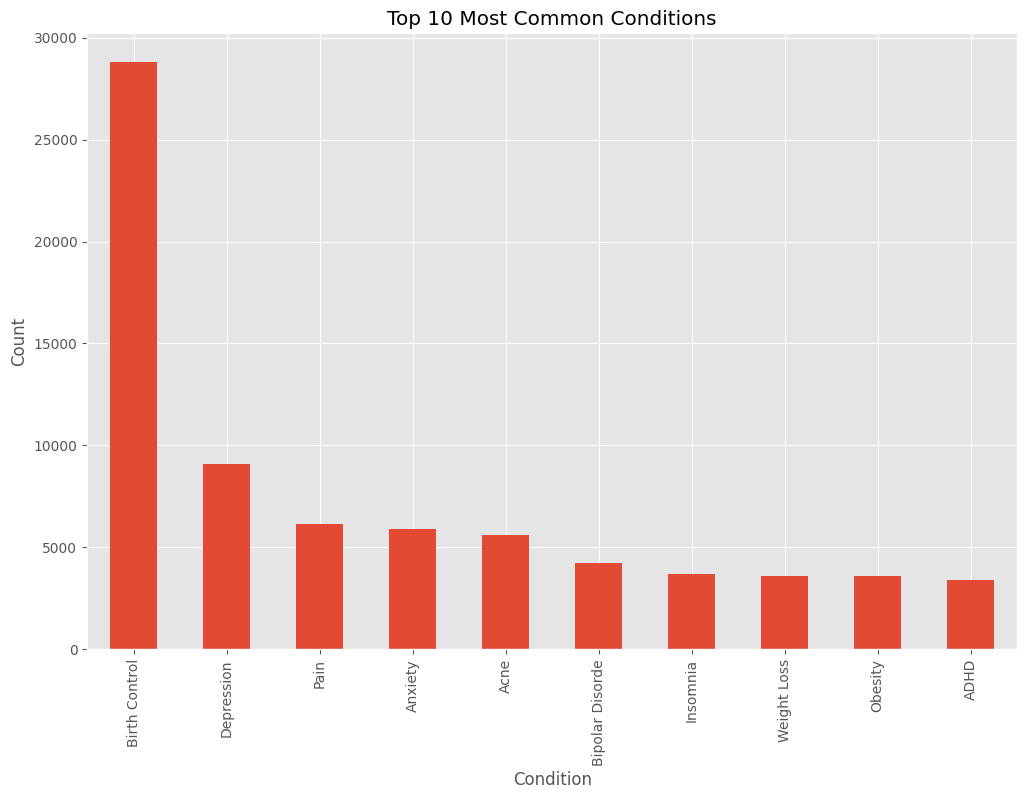

In [12]:
conditions[:10].plot(kind='bar')
plt.title('Top 10 Most Common Conditions')
plt.xlabel('Condition')
plt.ylabel('Count');

**Rating Distribution**

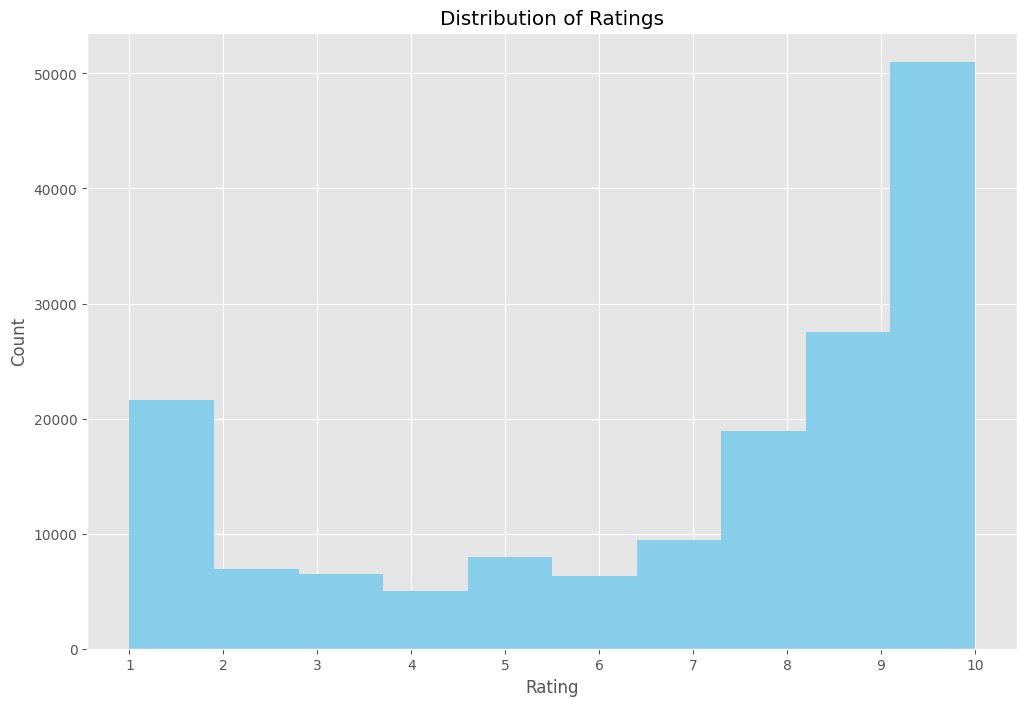

In [13]:
# Look at bias in review(also shown on 'Data' page in competition:distribution of ratings)
train.rating.hist(color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks([i for i in range(1,11)]);

This distribution illustrates that people generally write reviews for drugs they really like(or those that they really dislike) There are fewer middle ratings as compared to extreme ratings.

Text(0, 0.5, 'Count')

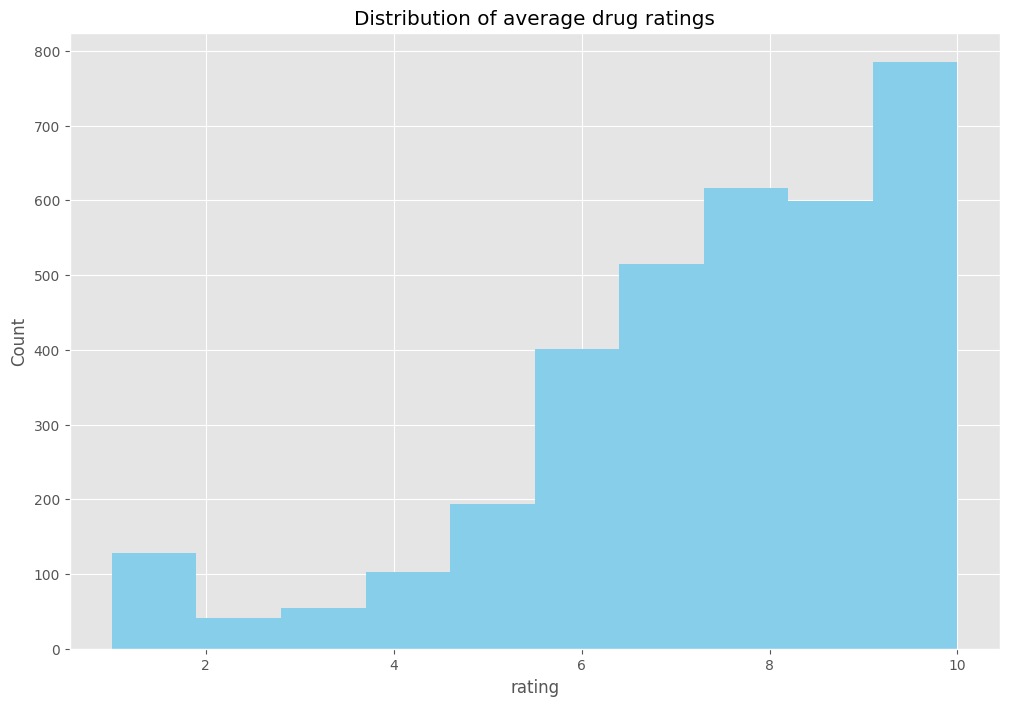

In [14]:
rating_avg = (train['rating'].groupby(train['drugName']).mean())
rating_avg.hist(color='skyblue')
plt.title('Distribution of average drug ratings')
plt.xlabel('rating')
plt.ylabel('Count')

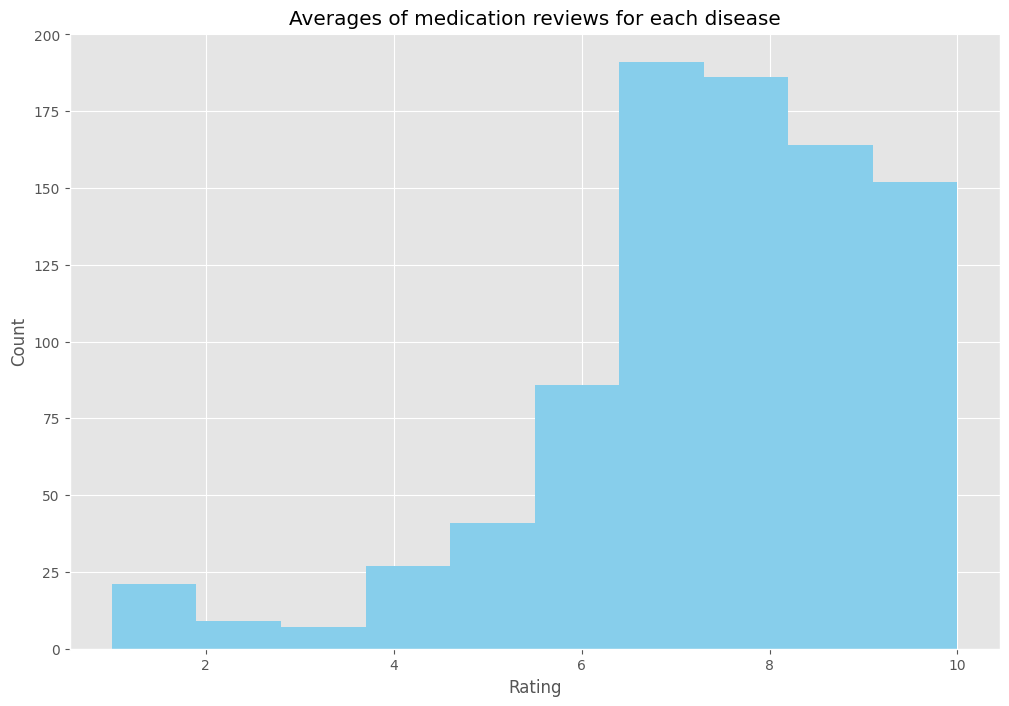

In [15]:
rating_avgs = (train['rating'].groupby(train['condition']).mean())
rating_avgs.hist(color='skyblue')
plt.title('Averages of medication reviews for each disease')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show();

# Usefullness vs Rating

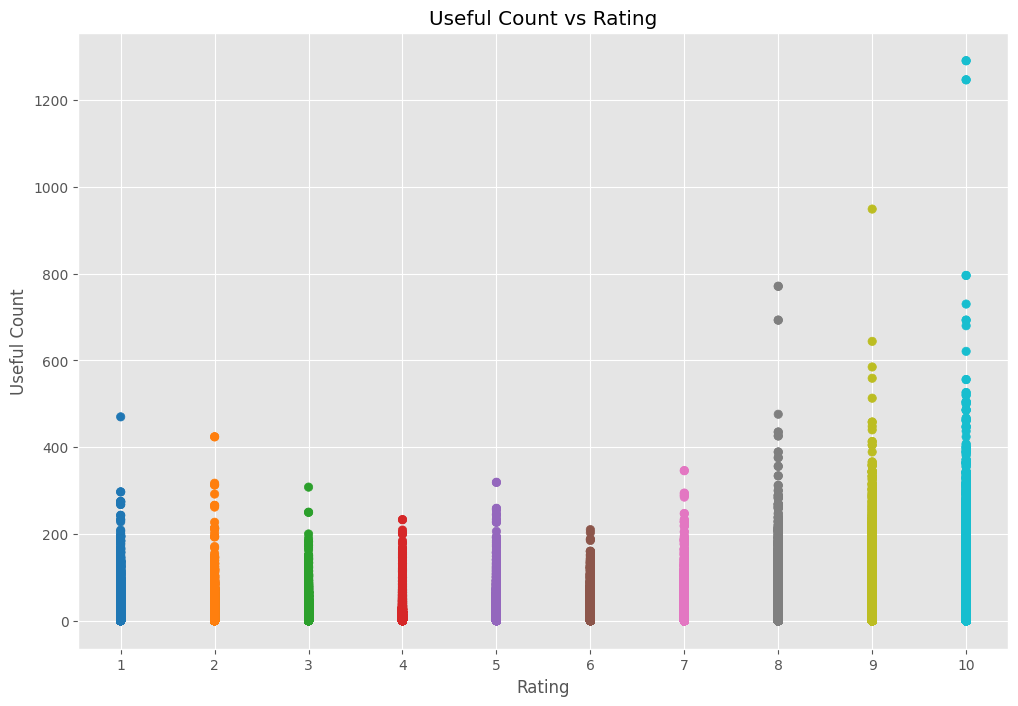

In [16]:
# Is rating correlated with usefulness of the review?
plt.scatter(train.rating, train.usefulCount, c=train.rating.values, cmap='tab10')
plt.title('Useful Count vs Rating')
plt.xlabel('Rating')
plt.ylabel('Useful Count')
plt.xticks([i for i in range(1,11)]);

In [17]:
# Create a list (cast into an array) containing the average usefulness for given ratings

use_ls = []

for i in range(1,11):
  use_ls.append([i, np.sum(train[train.rating==i].usefulCount)/np.sum([train.rating==i])])

use_arr=np.asarray(use_ls)

([<matplotlib.axis.XTick at 0x7dcc7772eb00>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

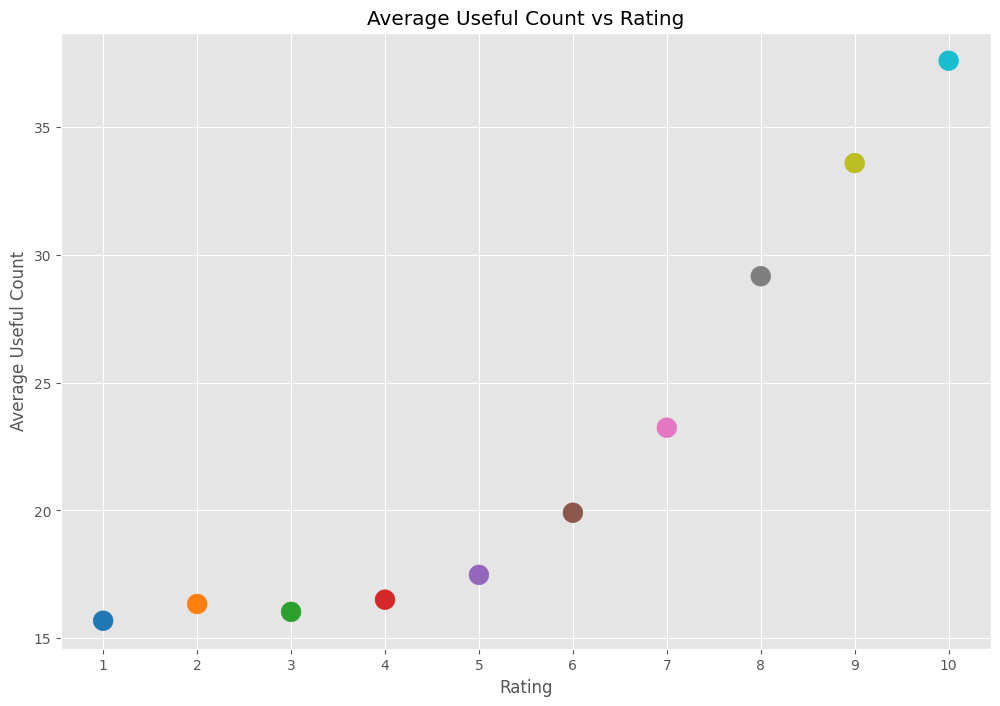

In [18]:
plt.scatter(use_arr[:,0], use_arr[:,1], c=use_arr[:,0], cmap='tab10', s=200)
plt.title('Average Useful Count vs Rating')
plt.xlabel('Rating')
plt.ylabel('Average Useful Count')
plt.xticks([i for i in range(1,11)])

Looks like people found reviews with higher scores to be more useful!
In the sense that reviews with high ratings recieved more 'useful' tags than reviews with low ratings.

I'm curious: what makes a review useful? Let's look at some of the most useful reviews:

In [19]:
# Sort train dataframe from most to least useful

useful_train = train.sort_values(by='usefulCount', ascending=False)
useful_train.iloc[:10]

,uniqueID,drugName,condition,review,rating,date,usefulCount
6716,96616,Sertraline,Depression,"""I remember reading people&#039;s opinions, on...",10,31-Jul-08,1291
33552,119152,Zoloft,Depression,"""I remember reading people&#039;s opinions, on...",10,31-Jul-08,1291
21708,131116,Levonorgestrel,Birth Control,"""I have had my IUD for over a year now and I t...",10,1-Apr-09,1247
4249,182560,Mirena,Birth Control,"""I have had my IUD for over a year now and I t...",10,1-Apr-09,1247
146145,119151,Zoloft,Depression,"""I&#039;ve been on Zoloft 50mg for over two ye...",9,5-Aug-08,949
58608,139141,Phentermine,Weight Loss,"""I have used this pill off and on for the past...",10,19-Oct-08,796
16889,52305,Adipex-P,Weight Loss,"""I have used this pill off and on for the past...",10,19-Oct-08,796
2039,62757,Citalopram,Depression,"""I responded after one week. The side effects ...",8,25-Mar-08,771
152838,89825,Celexa,Depression,"""I responded after one week. The side effects ...",8,25-Mar-08,771
5218,107655,Implanon,Birth Control,"""I was very nervous about trying Implanon afte...",10,19-Jul-10,730


In [20]:
# Print top 10 most useful reviews
for i in useful_train.review.iloc[:3]:
  print(i,'\n')

"I remember reading people&#039;s opinions, online, of the drug before I took it and it scared me away from it. Then I finally decided to give it a try and it has been the best choice I have made. I have been on it for over 4 months and I feel great. I&#039;m on 100mg and I don&#039;t have any side effects. When I first started I did notice that my hands would tremble but then it subsided. So honestly, don&#039;t listen to all the negativity because what doesn&#039;t work for some works amazing for others. So go based on youself and not everyone else. It may be a blessing in diguise. The pill is not meant to make you be all happy go lucky and see &quot;butterflies and roses&quot;, its meant to help put the chemicals in your mind in balance so you can just be who you are and not overly depressed. I still get sad some times, but that is normal, that is life, and it&#039;s up to people to take control to make a change. I did so by getting on this pill." 

"I remember reading people&#039;s

The useful reviews seem positive. Let's see some not-so-useful reviews.

In [21]:
# Print 10 of the least useful reviews
for i in useful_train.review.iloc[-3:]:
  print(i, '\n')

"I received Implanon in May of 2008. I am due to have it removed in 6 months however, for the past year I have experienced decrease in sex drive, weight gain of 30lbs and also mood swings. My periods have been very scheduled and fairly regular which was great until 4-5 months ago when I missed a period then was on time the following 2 months. Last month I started a week early and it was unusually light, this month I started 2 1/2 weeks early and it has been off and on spotting for the past 5 days. I did call the helpline when I missed my period. They did not seem to concerned and I have not been able to find ANYwhere the birth rates on this specific birth control! I loved it until a year ago so the first half of my experience was great the last half no." 

"The only warning my gyno gave me was that I would be spotting for about 15 days after having the IUD inserted, which was a damn lie.  I spotted for a whole four weeks after the procedure.  My uterus chilled for two weeks before I st

The not so useful reviews seem much more negative.The final review listed is barely  a review just a concerned patient asking question about the product.

Conclusion appear consistent with the above graph--reviewers find higher ratings/better reviews to be more useful than lower ratings/worse reviews. Does this represent some sort of bias within the useful count?

Also interested in quantifying the sentiment of these reivews?

In [22]:
import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [23]:
# Create list(cast to array) of compound polarity sentiment scores for reviews

sentiments = []

for i in train.review:
  sentiments.append(sid.polarity_scores(i).get('compound'))
sentiments = np.asarray(sentiments)

In [24]:
sentiments

array([-0.296 ,  0.8603,  0.7962, ..., -0.743 ,  0.6197,  0.6124])

In [25]:
useful_train['sentiment'] = pd.Series(data=sentiments)

In [26]:
useful_train = useful_train.reset_index(drop=True)
useful_train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,sentiment
0,96616,Sertraline,Depression,"""I remember reading people&#039;s opinions, on...",10,31-Jul-08,1291,0.9772
1,119152,Zoloft,Depression,"""I remember reading people&#039;s opinions, on...",10,31-Jul-08,1291,0.9772
2,131116,Levonorgestrel,Birth Control,"""I have had my IUD for over a year now and I t...",10,1-Apr-09,1247,0.7739
3,182560,Mirena,Birth Control,"""I have had my IUD for over a year now and I t...",10,1-Apr-09,1247,0.7739
4,119151,Zoloft,Depression,"""I&#039;ve been on Zoloft 50mg for over two ye...",9,5-Aug-08,949,-0.6815


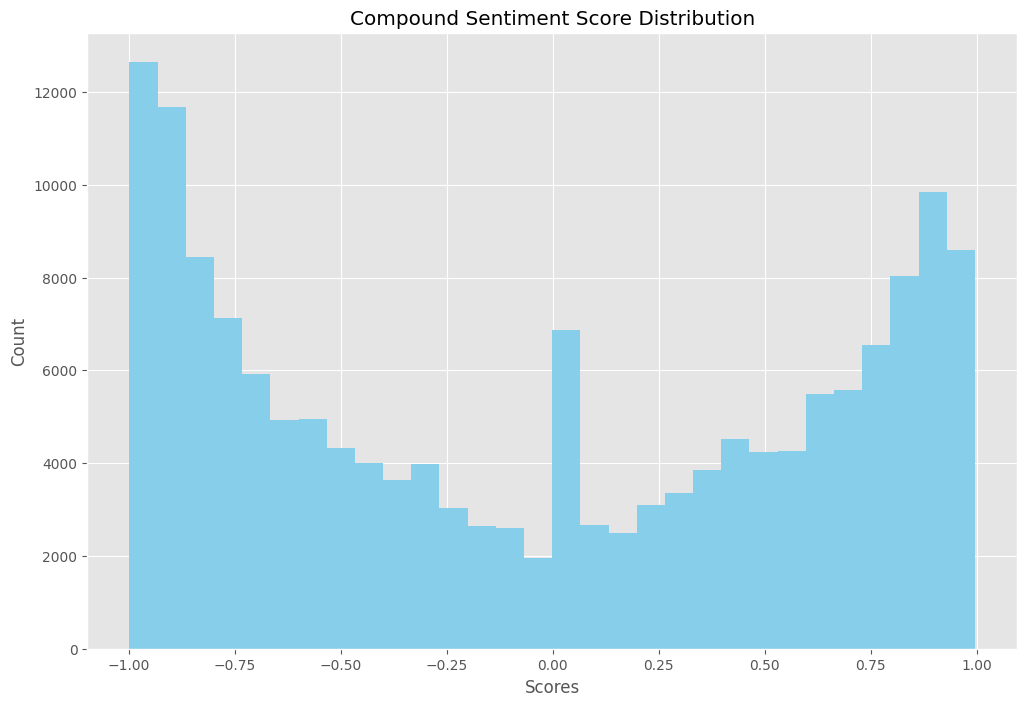

In [27]:
useful_train.sentiment.hist(color='skyblue', bins=30)
plt.title('Compound Sentiment Score Distribution')
plt.xlabel('Scores')
plt.ylabel('Count');

(0.0, 200.0)

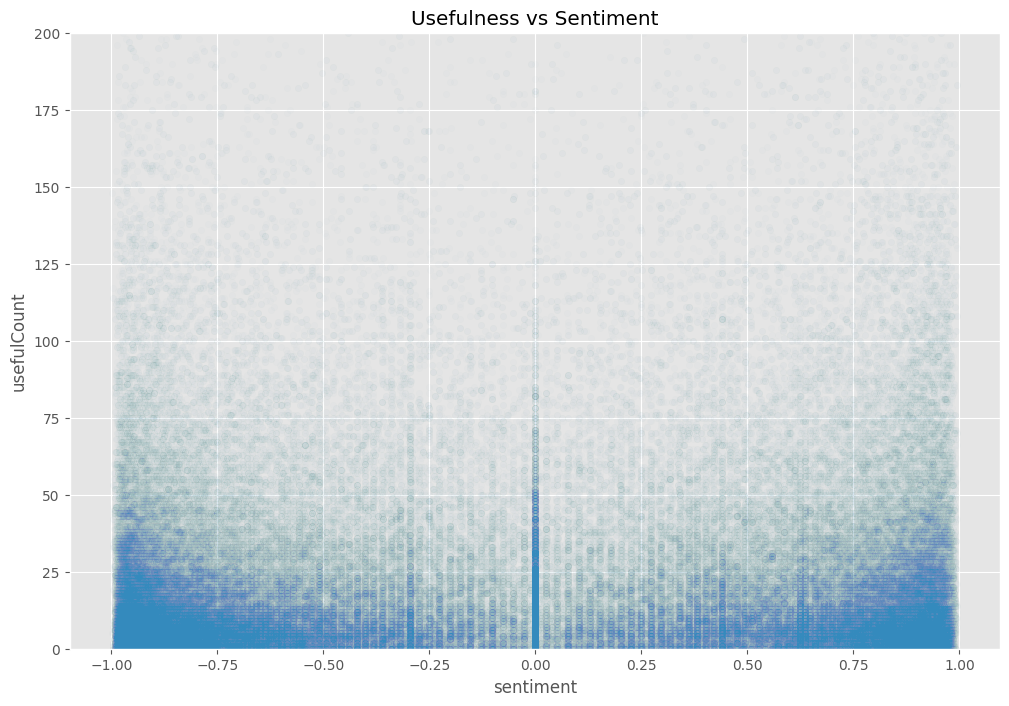

In [28]:
useful_train.plot(x='sentiment', y='usefulCount', kind='scatter', alpha=0.01)
plt.title('Usefulness vs Sentiment')
plt.ylim(0,200)

In [29]:
temp_ls = []
for i in range(1,11):
  temp_ls.append(np.sum(useful_train[useful_train.rating == i].sentiment)/np.sum(useful_train.rating==i))

([<matplotlib.axis.XTick at 0x7dcc773a1030>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

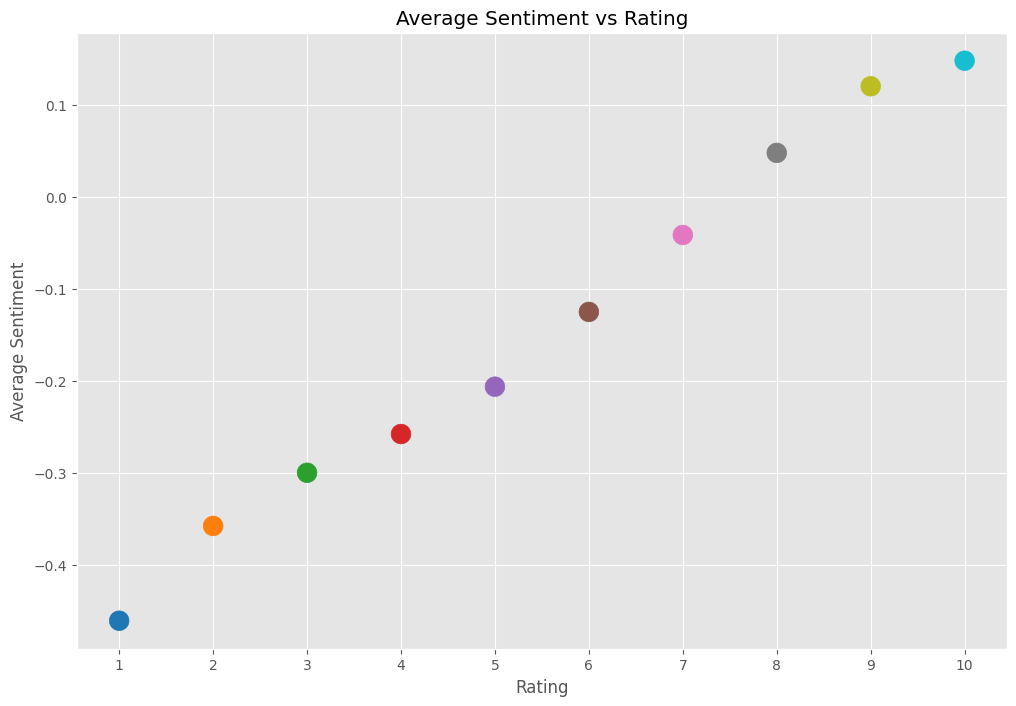

In [30]:
plt.scatter(x=range(1,11), y=temp_ls, c=range(1,11), cmap='tab10', s=200)
plt.title('Average Sentiment vs Rating')
plt.xlabel('Rating')
plt.ylabel('Average Sentiment')
plt.xticks([i for i in range(1,11)])

Let's see what other meaningful insights we can get from the data. Find the best and worst reviewed drugs overall:

In [31]:
# Create a list of all drugs and their average ratings, cast to dataframe

rate_ls = []

for i in train.drugName.unique():
  # Only consider drugs that have at least 10 ratings
  if np.sum(train.drugName == i) >= 10:
    rate_ls.append((i, np.sum(train[train.drugName == i].rating) / np.sum(train.drugName == i)))
avg_rate = pd.DataFrame(rate_ls)

In [32]:
# Sort drugs by their ratings, look at top 10 best and worst rated drugs
avg_rate = avg_rate.sort_values(by=[1], ascending=False).reset_index(drop=True)
avg_rate[:10]

,0,1
0,Zutripro,10.000000
1,Chlorpheniramine / hydrocodone / pseudoephedrine,10.000000
2,Silver sulfadiazine,9.972222
3,Drixoral Cold and Allergy,9.948718
4,Dexbrompheniramine / pseudoephedrine,9.947368
5,Emend,9.900000
6,Aprepitant,9.900000
7,Tegaserod,9.812500
8,Zelnorm,9.687500
9,Cyanocobalamin,9.666667


In [33]:
avg_rate[-10:]

,0,1
1371,Prevnar 13,3.363636
1372,Fosamax,3.166667
1373,Blisovi 24 Fe,3.088889
1374,Opdivo,3.083333
1375,Miconazole,3.033000
1376,Monistat 7,3.032258
1377,Alendronate,2.954545
1378,Yuvafem,2.318182
1379,Monistat 1-Day or Night Combination Pack,1.416667
1380,ProAir RespiClick,1.193548


# Best and Worst Drugs by Condition
Let's find the highest and lowest rated drugs for each condition.
This information will be helpful for a user who is looking for medication for a specific condition...

In [34]:
# Make dictionary of conditions, each value will be a dataframe of all of the drugs used to treat the given condition
help_dict = {}

# Iterate over conditions
for i in train.condition.unique():

    temp_ls = []

    # Iterate over drugs within a given condition
    for j in train[train.condition == i].drugName.unique():

        # If there are at least 10 reviews for a drug, save its name and average rating in temporary list
        if np.sum(train.drugName == j) >= 10:
            temp_ls.append((j, np.sum(train[train.drugName == j].rating) / np.sum(train.drugName == j)))

    # Save temporary list as a dataframe as a value in help dictionary, sorted best to worst drugs
    help_dict[i] = pd.DataFrame(data=temp_ls, columns=['drug', 'average_rating']).sort_values(by='average_rating', ascending=False).reset_index(drop=True)

Now we've got a very useful help_dict dictionary

WE can simply index the dictionary by a specific condition to see the top rated drugs for that condition. For example, let's look at the top 10 drugs for birth control:

In [35]:
help_dict ['Birth Control'].iloc[:10]

,drug,average_rating
0,Plan B,8.674917
1,Lybrel,7.600000
2,Ortho Evra,7.470320
3,Kyleena,7.463576
4,Levonorgestrel,7.391031
5,Ortho-Cept,7.250000
6,Skyla,7.246359
7,Copper,7.235197
8,Beyaz,7.042553
9,Dienogest / estradiol,6.875000


Drugs used for birth control are listed, from best to worst average rating. Let's the top 10 best drugs for some other conditions.

In [36]:
help_dict['Depression'].iloc[:10]

,drug,average_rating
0,Desipramine,9.285714
1,Xanax XR,8.947368
2,Alprazolam,8.933144
3,Xanax,8.881579
4,Parnate,8.763158
5,St. john's wort,8.739130
6,Nefazodone,8.727273
7,Methylin ER,8.700000
8,Clomipramine,8.680000
9,Phenelzine,8.666667


In [37]:
help_dict['Acne'].iloc[:10]

,drug,average_rating
0,Benzoyl peroxide,8.869565
1,Benzaclin,8.865385
2,Milk of Magnesia,8.833333
3,Benzoyl peroxide / erythromycin,8.750000
4,Magnesium hydroxide,8.710000
5,Accutane,8.427273
6,Isotretinoin,8.392453
7,Onexton,8.357143
8,Retin-A,8.342857
9,Atralin,8.250000


This information is really useful! We can easily find the best drugs for any given condition.

We can also see the worst rated drugs:

In [38]:
help_dict['Acne'].iloc[-10:]

,drug,average_rating
64,Ethinyl estradiol / norethindrone,5.591930
65,Sulfamethoxazole / trimethoprim,5.557875
66,Junel Fe 1 / 20,5.404545
67,Loryna,5.162791
68,Tri-Previfem,4.984615
69,Junel Fe 1.5 / 30,4.961538
70,Gildess Fe 1.5 / 30,4.791667
71,SMZ-TMP DS,4.666667
72,Gildess Fe 1 / 20,4.594286
73,Estarylla,3.707317


# Machine Learning Models
It's now time to begin trying different machine learning models and try treating this first as a classification problem, and then as a regression problem.

# Classification with sk-learn and Random Forests

We will apply random forests for the purpose of sentiment analysis of reviews. The obvious starting question for such an approach is how can we convert the raw text of the review into a data representation that can be used by a numerical classifier. To this end, we will use the process of vectorization. By vectorizing the "review" column, we can allow widely-varying lengths of text to be converted into a numerical format which can be processed by the classifier.

This is achieved via the TF-IDF method which involves creating tokens(i.e. individual words or groups of words extracted from the text).Once the list of tokens is created, they are assigned an index integer identifier which allows them to be listed. We can then count the number of words in the document and normalize them in such a way that de-emphasizes words that appear frequently (like "a", "the" etc). This creates what is known as a bag(multi-set) of words. Such a representation associates a real-valued vector to each review representing the importance of the tokens(words) in the review. This represents the entire corpus of reviews as a large matrix where each row of the matrix represents one of the reviews and each column represents a token occurence.

Term-Frequency Inverse Document-Frequency(TF-IDF) is a way of handling the excessive noise due to words such as "a", "the", "he", "she" etc. Clearly such common words will appear in many reviews, but do not provide much insight into the sentiment of the text and their high frequency tends to obfuscate words that provide significant insight into sentiment. More details about the method can be found on "wikipedia".

The main limitation of this approach is that it does not take into account the relative position of words within the document. Here we are only using the frequency of occurence. Nevertheless, it works pretty well for this data set.

In [39]:
# Creates TF-IDF vectorizer and transforms the corpus
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train.review)

# transforms test reviews to above vectorized format
X_test = vectorizer.transform(test.review)

the simplest type of model we can attempt to fit on this data is the Naive Bayes classifier. We will first test Naive Bayes on a binarized version of the rating column which attempts to identify which reviews are favorable. We define a favorable review as one which received a rating above 5. Given the simplest size involved for our data set. WE choose Naive Bayes over other classifiers due to its scalability.

In [40]:
# Create a column with binary rating indicating the polarity of a review
train['binary_rating'] = train['rating'] > 5

y_train_rating = train.binary_rating
clf = MultinomialNB().fit(X_train, y_train_rating)

# Evaluates model on test set
test['binary_rating'] = test.rating > 5
y_test_rating = test.binary_rating
pred = clf.predict(X_test)

print("Accuracy: %s" % str(clf.score(X_test, y_test_rating)))
print("Confusion Matrix")
print(confusion_matrix(pred, y_test_rating))

Accuracy: 0.7527247703009337
Confusion Matrix
[[ 3233   321]
 [12974 37238]]


In [41]:
# Trains random forest classifier

start = time.time()
rfc_rating = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10000, min_samples_split=0.001)
rfc_rating.fit(X_train, y_train_rating)
end = time.time()
print("Training time: %s" % str(end-start))

# Evaluate model on test set
pred = rfc_rating.predict(X_test)

print("Accuracy: %s" % str(rfc_rating.score(X_test, y_test_rating)))
print("Confusion Matrix")
print(confusion_matrix(pred, y_test_rating))

Training time: 364.05655908584595
Accuracy: 0.8310084439980657
Confusion Matrix
[[ 7252   131]
 [ 8955 37428]]


# Classification with Kereas


*   Neural networks usually scale very well with lots of data, and that's exactly what we have here(150,000 training examples, 50,000 test examples). We actually couldn't run all of these sk-learn as the kernel would just crash after a couple of minutes.However, keras plays with this much data very nicely.
*   While we are sticking to a simple NN in this kernel, other types of NN architecture can deal with natural language processing problems very well(long short term memory models, other types of recurrent networks).

*   Keras gives us lots of freedom to play with hyperparameters and design a network that would be best suited for our data.





In [42]:
b = "'@#$%^()&*;!.-"
X_train = np.array(train['review'])
X_test = np.array(test['review'])

def clean(X):
  for index, review in enumerate(X):
    for char in b:
      X[index] = X[index].replace(char, "")
  return(X)

X_train = clean(X_train)
X_test = clean(X_test)
print(X_train[:2])


['"It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"'
 '"My son is halfway through his fourth week of Intuniv We became concerned when he began this last week, when he started taking the highest dose he will be on For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation very unusual for him I called his doctor on Monday morning and she said to stick it out a few days See how he did at school, and with getting up in the morning The last two days have been problem free He is MUCH more agreeable than ever He is less emotional a good thing, less cranky He is remembering all the things he should Overall his behavior is better \r\nWe have tried many different medications and so far this is the most effective"']


Doing some preprocessing by removing all symbols from the review.

In [44]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from keras.utils import to_categorical
from gensim.models import Word2Vec
from nltk.cluster import KMeansClusterer
import nltk
nltk.download('stopwords')

vectorizer = CountVectorizer(binary=True, stop_words=stopwords.words('english'), lowercase=True, max_features=5000)
test_train = np.concatenate([X_train, X_test])
print(test_train.shape)

X_onehot = vectorizer.fit_transform(test_train)
stop_words = vectorizer.get_stop_words()
print(type(X_onehot))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


(215063,)
<class 'scipy.sparse._csr.csr_matrix'>




*   I use a CountVectorizer to vectorizer each of the different
reviews into 5000 features row vectors. This is a very similar approach to vectorization as the TDIF explained above.
*   This vectorizer is also set to not add in very common words such as "and" and "the" as features. This is specified in stop_words.








In [45]:
print(X_onehot.shape)
print(X_onehot.toarray())

(215063, 5000)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Sanity checking to see if the dimensions make sense, then peeking at what the actual X_onehot matrix looks like. We have our trimmed m number of examples, as well as 5000 columns so this looks right!

In [51]:
name_list = vectorizer.get_feature_names_out()
names = [[i] for i in name_list]
names = Word2Vec(names, min_count=1)
print(len(names.wv.key_to_index))  # Replacing vocab with key_to_index
print(list(names.wv.key_to_index)[:5])  # Showing the first five elements


5000
['zyrtec', 'excedrin', 'evra', 'ex', 'exacerbated']


In [54]:
def score_transform(X):
  y_reshaped = np.reshape(X['rating'].values, (-1, 1))
  for index, val in enumerate(y_reshaped):
    if val >= 8:
      y_reshaped[index] = 1
    elif val >= 5:
      y_reshaped[index] = 2
    else:
      y_reshaped[index] = 0
  y_result = to_categorical(y_reshaped)
  return y_result
  print(X_onehot)



*   Creating a helper function to easily create our "y" labels. We need to transform the review column to a "m" number of reviews by 3 columns, where index "0" is negative, "1" is positive and "2" is neutral.   

